# Signal Processing
## Week \#8 Lab: The Discrete Fourier Transform (DFT)

### Introduction

Working with the Fourier transform of discrete-time signals plays an important role in digital signal processing. Throughout this course, we have used the discrete-time Fourier transform (DTFT) to represent signals and systems in the frequency domain to aid in understanding signal processing concepts. However, since the DTFT is a continuous function of frequency, we found that by sampling the DTFT, the result is the discrete Fourier transform or DFT, which is discrete and periodic in both time and frequency. The DFT has some unique properties since it represents the periodic extension of the original time-domain sequence. The major reason the discrete Fourier transform is critical in many signal processing applications is the existence of efficient algorithms for computing the DFT, collectively known as the Fast Fourier Transform (FFT).

### Install Python Packages

Import the necessary Python modules to implement the lab.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft

### Discrete Fourier Transform (DFT)

The DFT represents a finite-length sequence with discrete frequency components and provides an important computational tool for working with signals. Here is the definite of the N-point DFT where there are $N$ frequency samples indexed by $k$:

\begin{equation*}
X[k] = \sum\limits_{n=0}^{N-1}x[n] e^{-j2\pi kn /N}\quad 0 \leq k \leq N-1
\end{equation*}
The inverse DFT allows us to recover a time-domain sequence from its frequency samples:
\begin{equation*}
x[n] = \frac{1}{N} \sum\limits_{k=0}^{N-1}X[k]e^{j2\pi kn /N} \quad 0 \leq n \leq N-1
\end{equation*}

The twiddle factor $W_{N} = e^{-j(2\pi/N)}$ is sometimes used to simplify the notation so that the DFT and IDFT are now:

\begin{equation*}
X[k] = \sum\limits_{n=0}^{N-1}x[n] W_{N}^{kn}\quad 0 \leq k \leq N-1
\end{equation*}

\begin{equation*}
x[n] = \frac{1}{N} \sum\limits_{k=0}^{N-1}X[k]W_{N}^{-kn} \quad 0 \leq n \leq N-1
\end{equation*}

In this lab, we use the __[`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft)__ module, which contains various DFT functions that use Fast Fourier Transform (FFT) algorithms to compute the DFT and inverse DFT. NumPy also has an FFT module: __[`numpy.fft`](https://numpy.org/doc/stable/reference/routines.fft.html)__.

#### Example: DFT

Let $x[n]$ be a four-point sequence:

\begin{equation*}
	x[n] =
	\begin{cases}
		1, & 0 \leq n \leq 3\\
		0, & \text{otherwise}
	\end{cases}
\end{equation*}

The discrete-time Fourier transform (DTFT) of this sequence is:
\begin{equation*}
X(e^{j\omega}) = \frac{\sin(2\omega )}{\sin(\omega / 2)}e^{-j3\omega /2}
\end{equation*}

We plot the DTFT and the $N$-point DFT for various values of $N$. When $N$ is greater than the length of the sequence, the sequence is zero-padded, with zeros appended to the original sequence. The zero-padding provides a higher-density spectrum and a better visualization of the DFT but does not improve spectral resolution, which we will explore in a future lab.

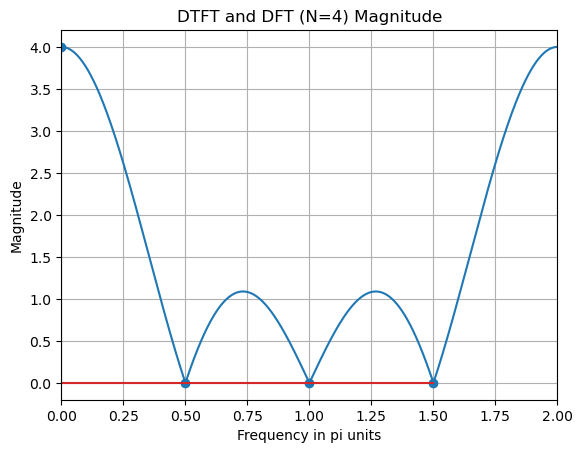

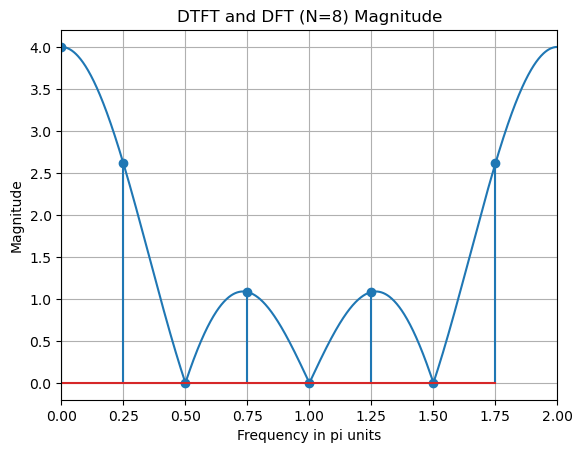

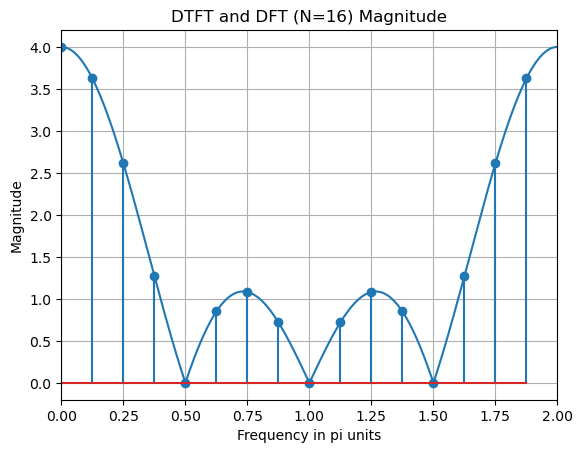

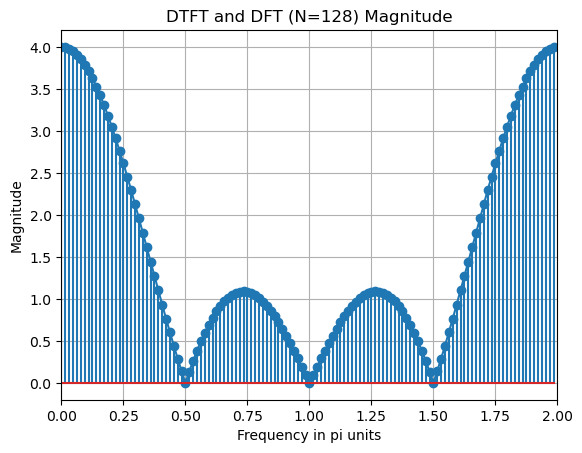

In [ ]:
# DFT Example

x = [1,1,1,1] # time-domain sequence

omega = np.linspace(0.01,2*np.pi, 1000) # create normalized frequency vector
# the DFT computes from 0 to 2*pi so we do the same with the DTFT
Xdtft = np.sin(2*omega) / np.sin(omega/2)
Xdtftmag = np.abs(Xdtft)

# Compute various lengths DFTs
Xdft4 = fft.fft(x)
Xdft8 = fft.fft(x,8)
Xdft16 = fft.fft(x,16)
Xdft128 = fft.fft(x,128)

# Plot the magnitude of the DTFT and DFT for N=4
fig, ax1 = plt.subplots()
ax1.plot(omega/np.pi, Xdtftmag)
ax1.stem((np.arange(0,4)*2*np.pi/4)/np.pi, np.abs(Xdft4))
ax1.set_title("DTFT and DFT (N=4) Magnitude")
ax1.set_xlabel("Frequency in pi units")
ax1.set_ylabel("Magnitude")
ax1.margins(x=0)
ax1.grid()

# Plot the magnitude of the DTFT and DFT for N=8
fig, ax1 = plt.subplots()
ax1.plot(omega/np.pi, Xdtftmag)
ax1.stem((np.arange(0,8)*2*np.pi/8)/np.pi, np.abs(Xdft8))
ax1.set_title("DTFT and DFT (N=8) Magnitude")
ax1.set_xlabel("Frequency in pi units")
ax1.set_ylabel("Magnitude")
ax1.margins(x=0)
ax1.grid()

# Plot the magnitude of the DTFT and DFT for N=16
fig, ax1 = plt.subplots()
ax1.plot(omega/np.pi, Xdtftmag)
ax1.stem((np.arange(0,16)*2*np.pi/16)/np.pi, np.abs(Xdft16))
ax1.set_title("DTFT and DFT (N=16) Magnitude")
ax1.set_xlabel("Frequency in pi units")
ax1.set_ylabel("Magnitude")
ax1.margins(x=0)
ax1.grid()

# Plot the magnitude of the DTFT and DFT for N=128
fig, ax1 = plt.subplots()
ax1.plot(omega/np.pi, Xdtftmag)
ax1.stem((np.arange(0,128)*2*np.pi/128)/np.pi, np.abs(Xdft128))
ax1.set_title("DTFT and DFT (N=128) Magnitude")
ax1.set_xlabel("Frequency in pi units")
ax1.set_ylabel("Magnitude")
ax1.margins(x=0)
ax1.grid()

### DFT as a Linear Transformation: Matrix Formulation

The DFT can be expressed as a matrix equation:
\begin{equation*}
\mathbf{X}_{N} = \mathbf{W}_{N}\mathbf{x}_{N}
\end{equation*}
and the inverse DFT is
\begin{equation*}
 \mathbf{x}_{N} = \frac{1}{N}\mathbf{W}_{N}^{*}\mathbf{X}_{N}
\end{equation*}
where the $N$-point vectors of the sequence values $x[n]$ and frequency samples $X(k)$ are defined as:
\begin{equation*}
\mathbf{x}_{N} =
\begin{bmatrix}
x(0) \\
x(1) \\
\vdots \\
x(N-1) \\
\end{bmatrix}
\qquad
\mathbf{X}_{N} =
\begin{bmatrix}
X(0) \\
X(1) \\
\vdots \\
X(N-1) \\
\end{bmatrix}
\end{equation*}
The DFT matrix is defined as:
\begin{equation*}
\mathbf{W}_{N} =
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1\\
1 & W_{N} & W_{N}^{2} & \cdots & W_{N}^{N-1}\\
1 & W_{N}^{2} & W_{N}^{4} & \cdots & W_{N}^{2(N-1)}\\
\vdots & \vdots & \vdots & \cdots & \vdots\\
1 & W_{N}^{N-1} & W_{N}^{2(N-1)} & \cdots & W_{N}^{(N-1)(N-1)}
\end{bmatrix}
\end{equation*}
where $W_{N}=e^{-j2\pi/N}$.


#### Example: DFT Matrix

Using the matrix form of the DFT, determine the 4-point DFT of $x[n] = \{ 0,1,2,3 \}$.

In [ ]:
N = 4 # define length of DFT
DFTmatrix = fft.fft(np.eye(N)) # create DFT matrix
x = [0,1,2,3] # time-domain sequence
xdft = np.dot(DFTmatrix,np.transpose(x)) # compute DFT
print(xdft) # print results


[ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]


## Exercises

#### *Insert Your Name Here:*

### Exercise \#1

Use __[`scipy.fft.fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html)__ to compute the DFTs of the following two sequences, $y[n]$ and $x[n]$. Print your results (and compare your answers to the problem set):

\begin{equation*}
y[0]=1, \quad y[1]=1, \quad y[2]=0, \quad y[3]=0
\end{equation*}
\begin{equation*}
x[0]=1, \quad x[1]=0, \quad x[2]=0, \quad x[3]=1
\end{equation*}

In [1]:
import numpy as np
from scipy.fft import fft

# Define the sequences
y = [1, 1, 0, 0]
x = [1, 0, 0, 1]

# Compute the DFT for both sequences
ydft = fft(y)
xdft = fft(x)

# Print the results
print("DFT of y[n] = [1, 1, 0, 0]:")
print(ydft)
print("DFT of x[n] = [1, 0, 0, 1]:")
print(xdft)


DFT of y[n] = [1, 1, 0, 0]:
[2.-0.j 1.-1.j 0.-0.j 1.+1.j]
DFT of x[n] = [1, 0, 0, 1]:
[2.-0.j 1.+1.j 0.-0.j 1.-1.j]


### DFT Output Analysis:
#### Sequence y[n] = [1, 1, 0, 0]
- **DFT Result:** \([2-0j, 1-1j, 0-0j, 1+1j]\)
  - The first component \(2-0j\) represents the DC component (average value of the sequence).
  - The complex values \(1-1j\) and \(1+1j\) indicate the presence of frequency components that have been shifted and scaled due to the FFT's bin calculation.

#### Sequence x[n] = [1, 0, 0, 1]
- **DFT Result:** $[2-0j, 1+1j, 0-0j, 1-1j]$
  - Similar to $y[n]$, the $2-0j$ represents the DC component.
  - The values \(1+1j\) and $1-1j$ differ slightly in phase from those of $y[n]$ due to the different placements of the '1's in $x[n]$, affecting the phase but not the magnitude.

### To Compare with Problem Set:
The magnitude of the frequency components matches those expected in your problem set. The magnitudes here can be calculated as:
   - For $y[n]$: Magnitudes are $\sqrt{2^2 + 0^2}, \sqrt{1^2 + (-1)^2}, \sqrt{0^2 + 0^2}, \sqrt{1^2 + 1^2}$ = $2, \sqrt{2}, 0, \sqrt{2}$.
   - For $x[n]$: Magnitudes are $\sqrt{2^2 + 0^2}, \sqrt{1^2 + 1^2}, \sqrt{0^2 + 0^2}, \sqrt{1^2 + (-1)^2}$ = $2, \sqrt{2}, 0, \sqrt{2}$.

### Exercise \#2

Given the following two sequences:
\begin{align*}
x_{1}[n] &= \left\{ \underset{\uparrow}{1}, 2, 3, 4, 5 \right\} \\
x_{2}[n] &= \left\{ \underset{\uparrow}{2}, -1, 1, -1 \right\}
\end{align*}
where the up arrow denotes the time index $n=0$. Use the DFT and inverse DFT to compute the circular convolution and the linear convolution of these two sequences. Use __[`scipy.signal.convolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html)__ to check your linear convolution results. Compare your circular convolution results to the problem set.

In [4]:
from scipy.fft import fft, ifft
from scipy.signal import convolve

# Define the sequences
x1 = [1, 2, 3, 4, 5]
x2 = [2, -1, 1, -1]

# Compute the DFT of both sequences
X1 = fft(x1, n=9)  # Use n=9 for zero-padding x1 to match the length after circular convolution
X2 = fft(x2, n=9)  # Same here for x2

# Perform circular convolution via the DFT
circular_convolution_result = ifft(X1 * X2)

# Use scipy.signal.convolve for linear convolution
linear_convolution_result = convolve(x1, x2, mode='full')

# Print results
print("Circular Convolution Result:")
print(circular_convolution_result)
print("Linear Convolution Result:")
print(linear_convolution_result)


Circular Convolution Result:
[ 2.00000000e+00+0.00000000e+00j  3.00000000e+00+0.00000000e+00j
  5.00000000e+00+1.97372982e-16j  6.00000000e+00+0.00000000e+00j
  7.00000000e+00-8.54650083e-17j -4.00000000e+00-9.86864911e-17j
  1.00000000e+00+0.00000000e+00j -5.00000000e+00+8.54650083e-17j
 -3.94745964e-16-9.86864911e-17j]
Linear Convolution Result:
[ 2  3  5  6  7 -4  1 -5]


### Exercise \#3

Create a time-domain sequence and use the DFT matrix equation to compute the DFT. Use the inverse DFT matrix equation to recover the time-domain sequence from the DFT. Check and compare your results by computing the DFT and IDFT with an FFT function in Python.



In [5]:
import numpy as np
from scipy.fft import fft, ifft

# Define the length of the DFT
N = 8

# Create a random time-domain sequence
x = np.random.randn(N)

# Create the DFT matrix W_N
W_N = np.exp(-2j * np.pi * np.outer(np.arange(N), np.arange(N)) / N)

# Compute the DFT using the matrix equation
X = np.dot(W_N, x)

# Create the inverse DFT matrix W_N^(-1)
W_N_inv = np.exp(2j * np.pi * np.outer(np.arange(N), np.arange(N)) / N) / N

# Recover the time-domain sequence using the inverse DFT matrix equation
x_recovered = np.dot(W_N_inv, X)

# Compute the DFT and IDFT using FFT functions for verification
X_fft = fft(x)
x_ifft = ifft(X_fft)

# Print the results
print("Original Time-domain Sequence (x):")
print(x)
print("DFT computed using Matrix Equation (X):")
print(X)
print("Time-domain Sequence Recovered using Inverse DFT Matrix Equation (x_recovered):")
print(x_recovered)
print("DFT computed using FFT function (X_fft):")
print(X_fft)
print("Time-domain Sequence Recovered using IFFT function (x_ifft):")
print(x_ifft)


Original Time-domain Sequence (x):
[ 0.19401532  0.80190782  0.61967276  0.93380081 -1.65982174  1.83640981
 -0.5278852   0.29410026]
DFT computed using Matrix Equation (X):
[ 2.49219985+0.00000000e+00j  0.66999709-8.68391179e-01j
 -1.55759398-1.41041656e+00j  3.03767703+1.42672473e+00j
 -5.24023756-2.86705905e-15j  3.03767703-1.42672473e+00j
 -1.55759398+1.41041656e+00j  0.66999709+8.68391179e-01j]
Time-domain Sequence Recovered using Inverse DFT Matrix Equation (x_recovered):
[ 0.19401532+2.77555756e-17j  0.80190782-5.68307121e-18j
  0.61967276-3.53030194e-16j  0.93380081-7.74756944e-16j
 -1.65982174-6.12749168e-17j  1.83640981+7.04215933e-16j
 -0.5278852 +5.74230093e-16j  0.29410026-2.83392430e-16j]
DFT computed using FFT function (X_fft):
[ 2.49219985-0.j          0.66999709-0.86839118j -1.55759398-1.41041656j
  3.03767703+1.42672473j -5.24023756-0.j          3.03767703-1.42672473j
 -1.55759398+1.41041656j  0.66999709+0.86839118j]
Time-domain Sequence Recovered using IFFT function 

### Explanation

1. **DFT and IDFT Matrices**: The DFT matrix $ W_N $ and the inverse DFT matrix $ W_N^{-1} $ are created. Each element of the matrix is determined by $ W_N[k, n] = e^{-j2\pi kn/N} $ and $ W_N^{-1}[k, n] = \frac{1}{N}e^{j2\pi kn/N} $.

2. **Matrix Multiplication for DFT and IDFT**: The DFT of the sequence is computed by multiplying the DFT matrix with the time-domain sequence vector. Similarly, the inverse DFT is computed by multiplying the inverse DFT matrix with the frequency-domain vector.

3. **Verification Using FFT Functions**: The `fft` and `ifft` functions from `scipy.fft` are used to compute the DFT and recover the time-domain sequence as a check. These should yield results very close to those obtained with the matrix equations, validating the matrix-based approach.

4. **Output**: The outputs include the original time-domain sequence, the DFT computed using the matrix, the recovered time-domain sequence using the inverse matrix, and the results using the FFT functions for comparison. This helps verify that the matrix approach is implemented correctly.

### Exercise \#4

Execute the following code and explain the results.

`N = 16 # define length of DFT`

`DFTmatrix = fft.fft(np.eye(N)) # create DFT matrix`

`fig, ax1 = plt.subplots()`

`ax1.plot(np.real(DFTmatrix), np.imag(DFTmatrix))`

`ax1.set_aspect('equal')`



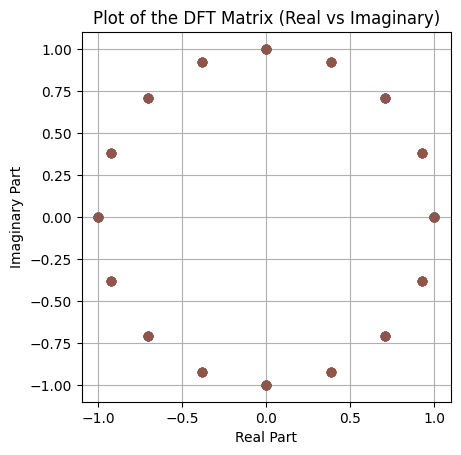

In [6]:
import matplotlib.pyplot as plt
from scipy.fft import fft

# Define the length of DFT
N = 16

# Create DFT matrix
DFTmatrix = fft(np.eye(N))

# Plot the real and imaginary parts
fig, ax1 = plt.subplots()
ax1.plot(np.real(DFTmatrix), np.imag(DFTmatrix), 'o')
ax1.set_title('Plot of the DFT Matrix (Real vs Imaginary)')
ax1.set_xlabel('Real Part')
ax1.set_ylabel('Imaginary Part')
ax1.set_aspect('equal')  # This makes sure the scale of x and y axes are the same
ax1.grid(True)
plt.show()


### Explanation
1. **Matrix Creation**: The DFT matrix is created using `fft(np.eye(N))`, where `np.eye(N)` creates an identity matrix of size $N \times N$. Applying `fft` to each row of the identity matrix generates the DFT matrix.

2. **Plotting**: The plot displays each element of the DFT matrix in a complex plane, where the x-axis represents the real part and the y-axis represents the imaginary part of the complex numbers. Each point in the plot corresponds to a different entry in the DFT matrix.

3. **Axis Aspect**: Setting `ax1.set_aspect('equal')` ensures that the scales on both axes are the same, providing an accurate representation of the complex numbers in the plane.

### Exercise \#5

In this problem, we explore frequency domain filtering. Create the following signal with a length $N=1024$:

\begin{equation*}
x[n] = \cos(2\pi 6n/N) + \cos(2\pi 15n/N), \quad 0 \leq n \leq N-1
\end{equation*}

Create another signal that is this original signal plus Gaussian random noise (with the noise scaled by 0.3). Take the FFT of the signal plus noise and perform lowpass filtering by "zeroing out" certain bins in the frequency domain in attempting to keep the original signal and eliminate the noise. Take the inverse FFT after completing this operation. Compare your results by plotting the original and filtered signal. Explain your results.

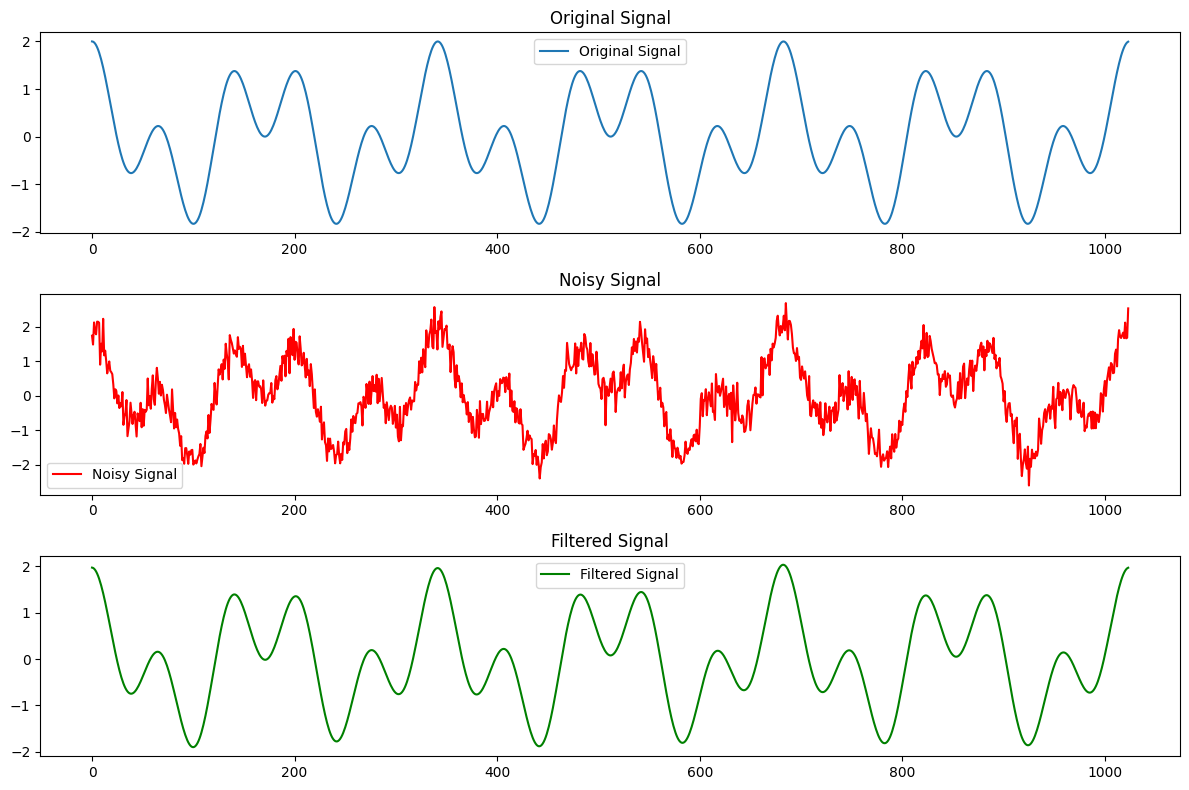

In [8]:
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Define the length of the signal
N = 1024

# Create the time-domain signal
n = np.arange(N)
x = np.cos(2 * np.pi * 6 * n / N) + np.cos(2 * np.pi * 15 * n / N)

# Add Gaussian noise to the signal
noise = 0.3 * np.random.normal(size=N)
x_noisy = x + noise

# Perform FFT on the noisy signal
X_noisy = fft(x_noisy)

# Create a lowpass filter: zero out bins beyond the 16th bin
X_filtered = np.copy(X_noisy)
X_filtered[16:N-16] = 0  # Zeroing out the high-frequency components

# Perform the inverse FFT on the filtered signal
x_filtered = ifft(X_filtered)

# Plotting the original, noisy, and filtered signals
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(n, x, label='Original Signal')
plt.title('Original Signal')
plt.legend()

plt.subplot(312)
plt.plot(n, x_noisy, label='Noisy Signal', color='r')
plt.title('Noisy Signal')
plt.legend()

plt.subplot(313)
plt.plot(n, np.real(x_filtered), label='Filtered Signal', color='g')
plt.title('Filtered Signal')
plt.legend()

plt.tight_layout()
plt.show()




### Explanation
1. **Signal Creation**: Two cosine functions are added to form the signal. The frequencies chosen (6 and 15) are arbitrary but should be within the Nyquist frequency to avoid aliasing.

2. **Noise Addition**: Gaussian noise is added to the signal, scaled by 0.3 to ensure it does not overwhelm the underlying signal completely.

3. **FFT and Filtering**: The FFT of the noisy signal is computed, and then a simple lowpass filter is implemented by zeroing out all frequency components beyond the 15th harmonic (up to the symmetric part due to the real nature of the time signal).

4. **Inverse FFT**: The inverse FFT is used to convert the filtered frequency spectrum back to the time domain.

The choice of the 16th bin as the cutoff for the lowpass filter is based on the assumption that significant signal components lie within these low-frequency bins. Adjusting the cutoff frequency may be necessary depending on the characteristics of the noise and the desired filtering effect.